In [1]:
#importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x)else x)


c:\Users\siddh\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_India = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

df_DA_India = df_DA_India.dropna(subset=['salary_year_avg'])

In [7]:
df_DA_India = df_DA_India.explode('job_skills')
df_DA_India[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel
...,...,...
777313,111202.0,looker
777313,111202.0,powerpoint
784033,111175.0,power bi
784033,111175.0,tableau


In [19]:
df_DA_India_group = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_India_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_India_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)


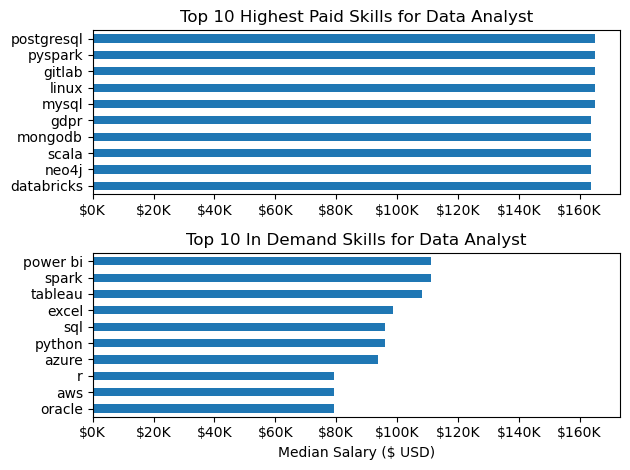

In [37]:
fig, ax = plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 In Demand Skills for Data Analyst')
ax[1].set_xlabel('Median Salary ($ USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].invert_yaxis()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

fig.tight_layout()